# DÍA 3 — Agrupar, resumir y visualizar con estilo

## Empezamos el día con algo muy interesante
### En el día anterior construimos un diccionario y lo convertimos en un dataset para poder trabajar con él. aprovechando que volvemos a tener que trabajar con el mismo DataFrame... **Vamos a aprender a exportar el DataFrame a CSV** Esto nos permitirá persistir nuestros datos y reutilizarlos fácilmente en cualquier otro cuaderno o entorno, sin necesidad de recrearlo cada vez..

1. **Primero repetimos lo del dia anterior:** para construir el diccionario y convertirlo en un DataFrame.

2. **En este paso guardaremos el DataFrame como un archivo CSV** (df_criaturas.to_csv('criaturas_magicas_mitologicas.csv', index=False))

3. **En este paso lo haremos descargable para poder descargarlo directamente desde el ordenador y hacerlo reutilizable en otros analisis y trabajos.**

¡¡Comenzamos!!

In [ ]:
# Creamos el diccionario llamado Datos y lo convertimos en un DataFrame al que llamamos criaturas

import pandas as pd

datos = {
    "Nombre": ["Fénix", "Dragón", "Unicornio", "Quimera", "Hada", "Basilisco", "Pegaso", "Kraken", "Gólem", "Leviatán"],
    "Elemento": ["Fuego", "Fuego", "Luz", "Fuego", "Aire", "Oscuridad", "Aire", "Agua", "Tierra", "Agua"],
    "Origen": ["Egipto", "China", "Europa", "Grecia", "Bosque", "Leyenda", "Grecia", "Mitología nórdica", "Cábala", "Biblia"],
    "Poder": [95, 100, 85, 92, 60, 97, 80, 99, 70, 98],
    "Amistoso": [True, False, True, False, True, False, True, False, False, False],
    "Extinto": [True, False, False, True, False, True, False, False, False, True]
}

criaturas = pd.DataFrame(datos)


In [ ]:
# Guardamos el archivo como un CSV

criaturas.to_csv("criaturas_magicas.csv", index=False)

### Para guardar el DataFrame como un archivo CSV en nuestro entorno de trabajo (en este caso, Google Colab), usamos el método .to_csv(). Es crucial añadir index=False para evitar que pandas escriba el índice del DataFrame como una columna adicional en el archivo CSV, ya que rara vez es necesario y puede generar una columna redundante.

* Usas index=False cuando:

 1.  No quieres guardar el índice.

 2. Quieres un archivo CSV más limpio, como una simple tabla.

 3. No necesitas esa columna extra para nada.

 En este caso concreto, como el indice no tiene significado especial, solo enumera las filas, es mejor no guardarlo.


In [ ]:
# Lo hacemos descargable en google colab para poder descargarlo directamente en el ordenador.

from google.colab import files
files.download("criaturas_magicas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Con los pasos anteriores ya tenemos el DataFrame creado, convertido en CSV y descargado. todo listo,
### ahora lo que toca es cargarlo para empezar a trabajar con el

In [ ]:
# cargamos el csv y lo llamamos criaturas2
criaturas2 = pd.read_csv("criaturas_magicas.csv")

### Como vimos en el dia 2, comenzamos con una exploración inicial

In [ ]:
#vamos a ver las 5 primeras lineas de nuestro DataFrame recien cargado
criaturas2.head()

,Nombre,Elemento,Origen,Poder,Amistoso,Extinto
0,Fénix,Fuego,Egipto,95,True,True
1,Dragón,Fuego,China,100,False,False
2,Unicornio,Luz,Europa,85,True,False
3,Quimera,Fuego,Grecia,92,False,True
4,Hada,Aire,Bosque,60,True,False


#### Vemos que hay mucha información de las criaturas mágicas, su nombre, elemento e incluso si son amistosas o estan extinguidas.

#### Este dataset permitirá explorar muchos matices de las criaturas mágicas y poder sacar conclusiones interesantes.


##🧙‍♀️ Agrupando y Resumiendo Datos: Desvelando Patrones Escondidos

#### Cuando tienes muchas criaturas y quieres ver patrones, agruparlas es como organizarlas por casas de Hogwarts

#### Imagina que queremos saber cuántas criaturas hay de cada elemento... o cuál es el nivel de poder promedio de las criaturas de fuego vs. las de agua. Para esto, necesitamos agrupar nuestros datos. Aquí es donde entra en juego la magia de .groupby().

#### .groupby(): "El método .groupby() nos permite dividir el DataFrame en grupos basados en los valores de una o más columnas.

#### Si queremos el promedio de una columna numérica por grupo, usamos .mean().

In [ ]:
# Ver el poder medio por elemento
criaturas2.groupby("Elemento")["Poder"].mean()

# groupby("Elemento") agrupa por la columna "Elemento" (Fuego, Aire...)
# ["Poder"].mean() calcula el promedio (media) de poder por grupo

,Poder
Elemento,
Agua,98.500000
Aire,70.000000
Fuego,95.666667
Luz,85.000000
Oscuridad,97.000000
Tierra,70.000000


#### ¡Listo!, tenemos un ranking genial del poder de las criaturas por elemento.

#### Si queremos contar cuántas criaturas hay en cada grupo (Elemento), podemos combinar .groupby() con .size().

In [ ]:
criaturas2.groupby('Elemento').size()

,0
Elemento,
Agua,2
Aire,2
Fuego,3
Luz,1
Oscuridad,1
Tierra,1


#### ¡Misión cumplida! Ahora sabemos que en nuestro reino mágico, las criaturas de Fuego son las más numerosas, seguidas por las de Tierra. ¿Curioso, verdad? Esto ya nos da una primera idea de la demografía elemental.

## Ejercicios:
### Escríbelos tú para practicar más:
1. ¿Cuál es el poder máximo por Origen?

2. ¿Cuántas criaturas hay por Elemento?

3. ¿Qué elemento tiene el poder promedio más alto?

In [ ]:
# Poder maximo por origen

criaturas2.groupby("Origen")['Poder'].max()

,Poder
Origen,
Biblia,98
Bosque,60
China,100
Cábala,70
Egipto,95
Europa,85
Grecia,92
Leyenda,97
Mitología nórdica,99


In [ ]:
# Cantidad de criaturas que hay por elemento
criaturas2["Elemento"].value_counts()

,count
Elemento,
Fuego,3
Aire,2
Agua,2
Luz,1
Oscuridad,1
Tierra,1


In [ ]:
# Elemento que tiene el poder promedio mas alto

promedios = criaturas2.groupby('Elemento')['Poder'].mean()
promedios.idxmax()

# usamos idxmax() para que me de el indice del promedio maximo, como el indice de la lista promedios es elemento me da el elemento
# si pusiera promedios.max() lo que me daria seria el promedio mas alto, no el elemento

'Agua'

## Seguimos con el temario
### añadiendo una colunna nueva a la que llamaremos Rareza


In [ ]:
# Añadimos la columna nueva

criaturas2["Rareza"] = ["Común", "Épico", "Común", "Épico", "Común", "Épico", "Común", "Raro", "Común", "Épico"]

In [ ]:
# Imprimimos la tabla para ver si se añadió

criaturas2

,Nombre,Elemento,Origen,Poder,Amistoso,Extinto,Rareza
0,Fénix,Fuego,Egipto,95,True,True,Común
1,Dragón,Fuego,China,100,False,False,Épico
2,Unicornio,Luz,Europa,85,True,False,Común
3,Quimera,Fuego,Grecia,92,False,True,Épico
4,Hada,Aire,Bosque,60,True,False,Común
5,Basilisco,Oscuridad,Leyenda,97,False,True,Épico
6,Pegaso,Aire,Grecia,80,True,False,Común
7,Kraken,Agua,Mitología nórdica,99,False,False,Raro
8,Gólem,Tierra,Cábala,70,False,False,Común
9,Leviatán,Agua,Biblia,98,False,True,Épico


## 🎨 Visualización de Datos con Estilo: Gráficos Encantados

### Los números son geniales, pero a veces, una imagen vale más que mil datos. Para que nuestros descubrimientos mágicos sean fáciles de entender para todos, vamos a visualizarlos. Usaremos matplotlib.pyplot y seaborn.

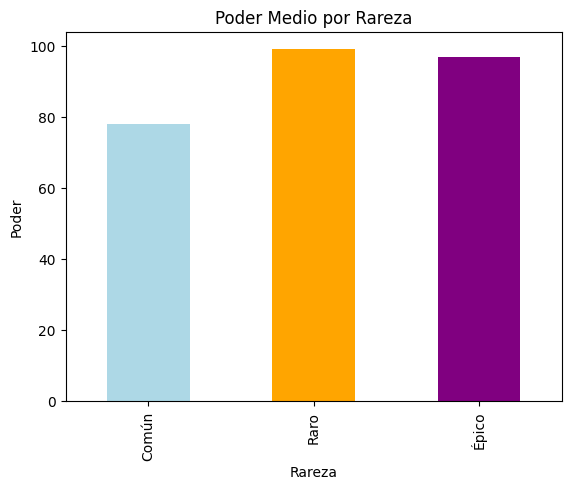

In [ ]:
# cargamos matplotlib.pyplot que es la libreria de graficos y hacemos un grafico de barras
import matplotlib.pyplot as plt
# grafico de barras: poder medio por Rareza

criaturas2.groupby("Rareza")['Poder'].mean().plot(kind="bar", color=["lightblue", "orange", "purple"])
plt.title("Poder Medio por Rareza")
plt.ylabel("Poder")
plt.xlabel("Rareza")
plt.show()

## EJERCICIOS VISUALES:

### Gráfico circular del porcentaje de criaturas por Rareza:

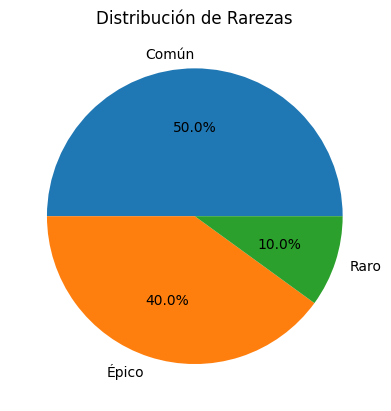

In [ ]:
criaturas2["Rareza"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribución de Rarezas")
plt.ylabel("") #Para que no aparezca etiqueta rara
plt.show()

### Gráfico de barras con criaturas por Origen:

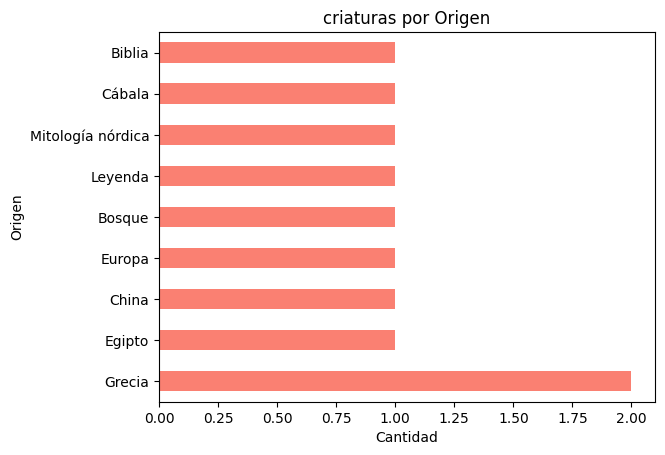

In [ ]:
criaturas['Origen'].value_counts().plot(kind='barh', color='salmon')
plt.title('criaturas por Origen')
plt.xlabel('Cantidad')
plt.ylabel('Origen')
plt.show()

## 🧠 RETO MÁGICO (avanzado y opcional)

### ¿Puedes mostrar en un gráfico de barras el poder medio por cada combinación de Elemento y Rareza?

<Axes: xlabel='Elemento'>

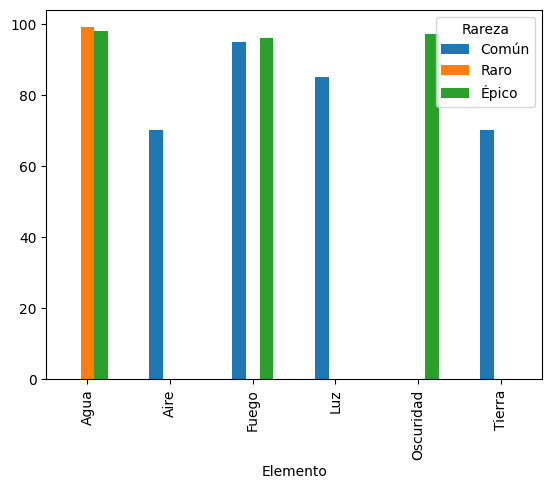

In [ ]:
criaturas2.groupby(["Elemento", "Rareza"])['Poder'].mean().unstack().plot(kind="bar")

## 🌟 Cierre del Día 3: Datos Agrupados, Historias Reveladas

  ¡Felicitaciones! Hoy hemos dado un gran salto en nuestra aventura de ciencia de datos. No solo aprendimos a **salvaguardar nuestros datos** exportándolos a CSV (¡adiós a reescribir!), sino que también dominamos el arte de **agrupar y resumir información clave** con `groupby()`.

  Y lo más emocionante: hemos transformado números aburridos en **gráficos vibrantes y llenos de *insights***. La visualización es nuestra voz para contar las historias que los datos esconden.

  Estas habilidades son fundamentales para cualquier científico de datos que aspire a extraer el máximo valor de la información. ¡Cada día estamos más cerca de desvelar todos los secretos de nuestro reino mágico!

**¿Próximos desafíos?** ¡La aventura continúa!